# SOME BASICS CONCEPTS OF STATISTICS.

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [2]:
import statistics
df = sns.load_dataset('tips')

In [3]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
np.mean(df['size'])

2.569672131147541

In [5]:
np.median(df['total_bill'])

17.795

In [6]:
statistics.mode(df['total_bill'])

13.42

<AxesSubplot:xlabel='total_bill'>

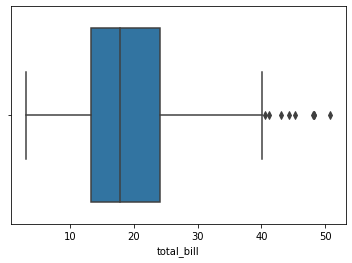

In [7]:
sns.boxplot(df['total_bill'])

<AxesSubplot:xlabel='total_bill', ylabel='Count'>

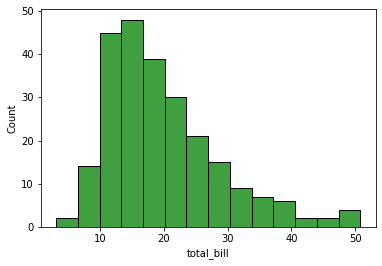

In [8]:
sns.histplot(df['total_bill'],color='g')

<AxesSubplot:xlabel='total_bill'>

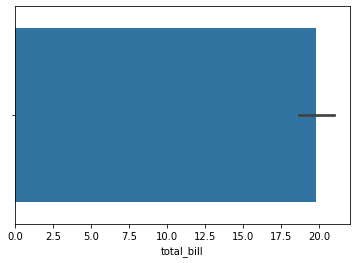

In [9]:
sns.barplot(df['total_bill'])


In [10]:
df1 = sns.load_dataset('iris')

In [11]:
df1.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [12]:
np.percentile(df1['sepal_length'],[25,75])

array([5.1, 6.4])

In [13]:
#Define our dataset
dataset = [11,10,12,13,14,109,155,14,12,11,15,107]

#Z-Score
outliers = []
def detect_outliers(dataset):
    threshold = 3 ##3 sd
    mean = np.mean(dataset)
    std = np.std(dataset)
    for i in dataset:
        z_score=(i-mean)/std
        if(np.abs(z_score)>threshold):
            outliers.append(i)
    return outliers
detect_outliers(dataset)

[]

In [14]:
#IQR
dataset = sorted(dataset)

In [15]:
dataset

[10, 11, 11, 12, 12, 13, 14, 14, 15, 107, 109, 155]

In [16]:
q1,q3 = np.percentile(dataset,[25,75])

In [17]:
print(q1,q3)

11.75 38.0


In [18]:
iqr = q3-q1
print(iqr)

26.25


In [19]:
#find the lower and higher fence 
lower_fence = q1-(1.5*iqr)
higher_fence = q3+(1.5*iqr)
print(lower_fence,higher_fence)

-27.625 77.375


<AxesSubplot:>

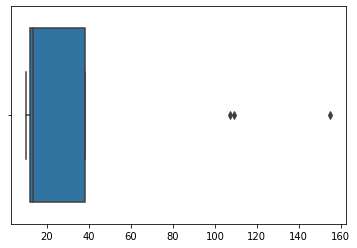

In [20]:
sns.boxplot(dataset)

# One Sample T - Test

In [21]:
ages = [10,20,35,50,28,55,64,77,18,17,20,43,29,89,90,19,34,47]
age_mean = np.mean(ages)
age_mean

41.388888888888886

In [22]:
sample_size=10
age_sample = np.random.choice(ages,sample_size)
age_sample

array([55, 29, 20, 17, 77, 20, 77, 35, 89, 10])

In [23]:
from scipy.stats import ttest_1samp
ttest,p_value = ttest_1samp(age_sample,30)
print(p_value)

0.1953900795440367


In [24]:
if p_value<=0.05:
    print("Reject Hypothesis")
else:
    print("Accept Hypothesis")

Accept Hypothesis


## Two- Sample T - Test

In [25]:
import scipy.stats as stats
import math
np.random.seed(12)
classA_ages = stats.poisson.rvs(loc=18,mu = 33 , size = 60)
classB_ages = stats.poisson.rvs(loc=18,mu = 34 , size = 60)
classB_ages.mean()

51.333333333333336

In [26]:
_,p_value = stats.ttest_ind(a = classA_ages,b = classB_ages,equal_var = False)

In [27]:
print(p_value)

0.49533079560036586


In [28]:
if p_value<=0.05:
    print("Reject Hypothesis")
else:
    print("Accept Hypothesis")

Accept Hypothesis


## Paired T - Test with Python


When you want to check how different samples from the same group are,you can go for a Paired T - Test.

In [29]:
weight1 = [25,30,28,35,46,26,29,30,26,28,32,31,30,45]
weight2 = weight1+stats.norm.rvs(scale = 5,loc = -1.25,size = 14)


In [30]:
print(weight1)
print(weight2)

[25, 30, 28, 35, 46, 26, 29, 30, 26, 28, 32, 31, 30, 45]
[25.65056793 23.96663484 33.09929495 34.50259688 40.9243432  22.06489822
 19.6935255  29.57494424 19.69611891 26.17300315 36.4501934  31.44001222
 31.12757231 56.9452304 ]


In [31]:
weight_df = pd.DataFrame({"weight_10":np.array(weight1),
                          "weight_20":np.array(weight2),
                          "weight-change":np.array(weight2)-np.array(weight1)})

In [32]:
weight_df

,weight_10,weight_20,weight-change
0,25,25.650568,0.650568
1,30,23.966635,-6.033365
2,28,33.099295,5.099295
3,35,34.502597,-0.497403
4,46,40.924343,-5.075657
5,26,22.064898,-3.935102
6,29,19.693525,-9.306475
7,30,29.574944,-0.425056
8,26,19.696119,-6.303881
9,28,26.173003,-1.826997


In [33]:
_,p_value = stats.ttest_rel(a=weight1,b = weight2)

In [34]:
p_value

0.6447477019604011

In [35]:
if p_value<=0.05:
    print("Reject Hypothesis")
else:
    print("Accept Hypothesis")

Accept Hypothesis


## CORRELATION

In [36]:
df = sns.load_dataset("iris")

In [37]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [38]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


In [39]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


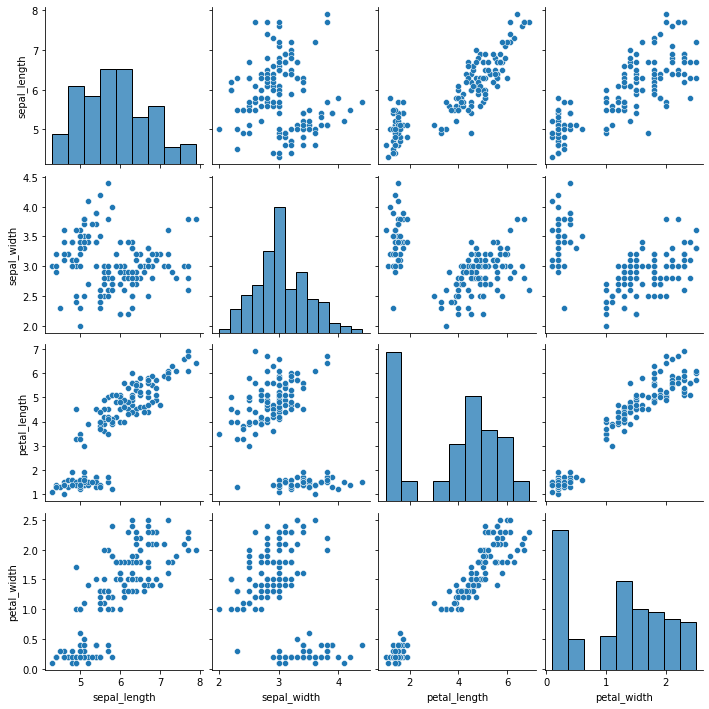

In [40]:
sns.pairplot(df)

## CHI - SQUARE TEST IMPLEMENTATION
The test is applied when you have two categorical variables from a single population. It is used to determine whether there is a significant  association between the two variables.

In [41]:
dataset = sns.load_dataset('tips')

In [42]:
dataset.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [43]:
dataset_table = pd.crosstab(dataset['sex'],dataset['smoker'])

In [44]:
dataset_table

smoker,Yes,No
sex,,
Male,60,97
Female,33,54


In [45]:
#Observed Values
Observed_values = dataset_table.values
print("Observed_Values:-\n",Observed_values)

Observed_Values:-
 [[60 97]
 [33 54]]


In [52]:
from scipy.stats import chi2_contingency
import scipy
val = stats.chi2_contingency(dataset_table)
val

(0.0,
 1.0,
 1,
 array([[59.84016393, 97.15983607],
        [33.15983607, 53.84016393]]))

# UNIVARIATE ANALYSIS

In [53]:
# Using an iris dataset
df_setosa = df.loc[df['species']=='setosa']
df_virginica = df.loc[df['species']=='virginica']
df_versicolor= df.loc[df['species']=='versicolor']

Text(0.5, 0, 'Petal_length')

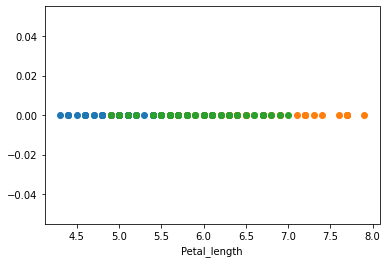

In [54]:
plt.plot(df_setosa['sepal_length'],np.zeros_like(df_setosa['sepal_length']),'o')
plt.plot(df_virginica['sepal_length'],np.zeros_like(df_virginica['sepal_length']),'o')
plt.plot(df_versicolor['sepal_length'],np.zeros_like(df_versicolor['sepal_length']),'o')
plt.xlabel('Petal_length')

#  BIVARIATE ANALYSIS

C:\Users\sakshi\AppData\Roaming\Python\Python39\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


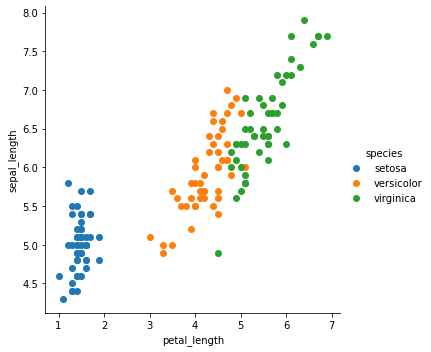

In [55]:
sns.FacetGrid(df,hue='species',size=5).map(plt.scatter,'petal_length','sepal_length').add_legend()

# MULTIVARIATE ANALYSIS

C:\Users\sakshi\AppData\Roaming\Python\Python39\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


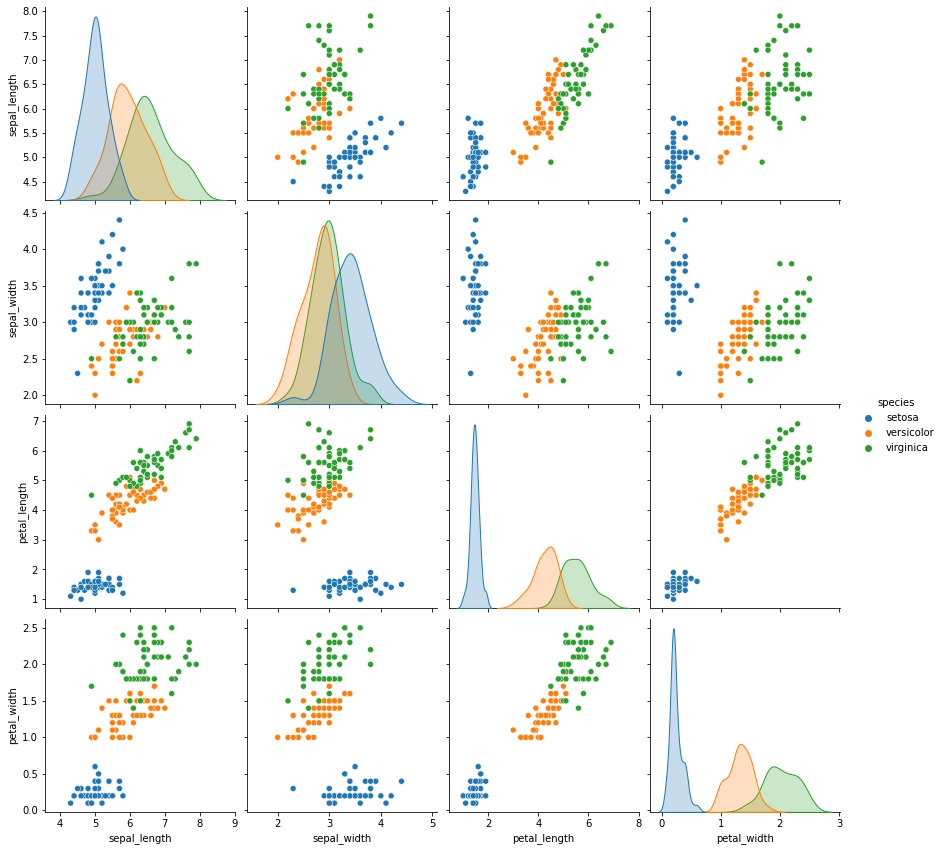

In [56]:
sns.pairplot(df,hue='species',size=3)